In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go

In [179]:
datosFifa = pd.read_csv('Recursos/fifa_datos.csv',',')
datosFifa.head()

/home/charly/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

In [180]:
datosFifa['Weight'] = datosFifa['Weight'].str.replace('lbs', '')
datosFifa['Weight'] = pd.to_numeric(datosFifa['Weight'] )

In [181]:
#lista1: Debajo de 125 lbs
#lista2: 125 lbs a 150 lbs
#lista3: 150 lb a 175 lbs
#lista4: 175 lbs o superior

lista1=datosFifa.loc[datosFifa['Weight'] < 125]
lista2=datosFifa.loc[(datosFifa['Weight'] >= 125) & (datosFifa['Weight'] < 150)]
lista3=datosFifa.loc[(datosFifa['Weight'] >= 150) & (datosFifa['Weight'] < 175)]
lista4=datosFifa.loc[datosFifa['Weight'] >= 175]

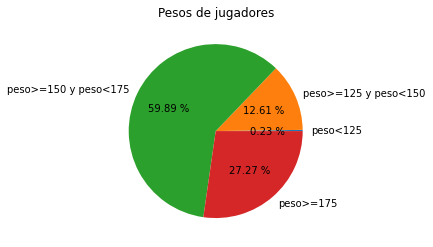

In [182]:
plt.figure()

etiquetas = ['peso<125', 'peso>=125 y peso<150', 'peso>=150 y peso<175', 'peso>=175']
plt.pie([len(lista1), len(lista2), len(lista3), len(lista4)], labels=etiquetas, autopct='%.2f %%')
plt.title('Pesos de jugadores')
plt.show()

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

In [185]:
#lista40: De 40 a 49
#lista50: De 50 a 59
#lista60: De 60 a 69
#lista70: De 70 a 79
#lista80: De 80 a 89
#lista90: De 90 a 99

lista40=datosFifa.loc[(datosFifa['Overall'] >= 40) & (datosFifa['Overall'] < 50)]
lista50=datosFifa.loc[(datosFifa['Overall'] >= 50) & (datosFifa['Overall'] < 60)]
lista60=datosFifa.loc[(datosFifa['Overall'] >= 60) & (datosFifa['Overall'] < 70)]
lista70=datosFifa.loc[(datosFifa['Overall'] >= 70) & (datosFifa['Overall'] < 80)]
lista80=datosFifa.loc[(datosFifa['Overall'] >= 80) & (datosFifa['Overall'] < 90)]
lista90=datosFifa.loc[(datosFifa['Overall'] >= 90) & (datosFifa['Overall'] < 100)]

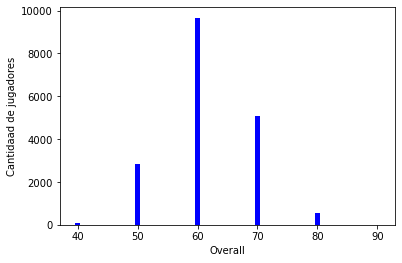

In [187]:
eje_x = [40,50,60,70,80,90]
eje_y = [len(lista40), len(lista50), len(lista60), len(lista70), len(lista80), len(lista90)]

plt.figure()
plt.bar(eje_x, eje_y, color="blue")
plt.ylabel('Cantidaad de jugadores')
plt.xlabel('Overall')
plt.show()


3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.

# REPORTLAB

Es una herramienta la cual nos permite generar archivos PDF el cual se basa en comandos graficos el cual tiene un lenguaje de plantillas de mas alto nivel el cual es similar al ded HTML y todo esto se convierte en un archivo PDF.

Para comenzar lo que se realiza es importar el paquete pdfgen de reportlab el cual nos ayudara a crear el PDF ademas el elemento que proporcciona los elementos de dibujo es el canvas el cual nos asyuda a medir la hoja en blanco mediante puntos con las coordenadas (x, y) las cuales tienen por defecto las coordenadas (0,0) y estos se ubican el la esquina superior izquierda.

Ademas de esto con canvas podemos especificar la dimencion de la hoja con la que vamos a trabajar y podemos utilizar los tamaños estandar que se suelen usar, por ejemplo una hoja A4 está constituida por 595.2 puntos de ancho (width) y 841.8 puntos de alto (height).

In [189]:
    from reportlab.lib.pagesizes import A4
    from reportlab.pdfgen import canvas
    w, h = A4
    c = canvas.Canvas("hola-mundo.pdf", pagesize=A4)
    c.drawString(50, h - 50, "¡Hola, mundo!")
    c.showPage()
    c.save()

#### Lineas y figuras geometricas

Tambien nos permite crear lineas y figuras geometrias como  líneas, rectángulos, círculos y otras figuras de una forma sencilla. Por ejemplo, para dibujar una línea invocamos el método line() indicando la posición de los dos puntos del segmento: x1, y1, x2, y2.

In [190]:
    from reportlab.lib.pagesizes import A4
    from reportlab.pdfgen import canvas
    w, h = A4
    c = canvas.Canvas("figuras.pdf", pagesize=A4)
    c.drawString(30, h - 50, "Línea")
    x = 120
    y = h - 45
    c.line(x, y, x + 100, y)
    c.drawString(30, h - 100, "Rectángulo")
    c.rect(x, h - 120, 100, 50)
    c.drawString(30, h - 170, "Círculo")
    c.circle(170, h - 165, 20)
    c.drawString(30, h - 240, "Elipse")
    c.ellipse(x, y - 170, x + 100, y - 220)
    c.showPage()
    c.save()

# Textos

Para la escritura dentro del documento PDF que vallamos a generar podemos definir el tipo y tamaño de letra pero primero lo que sebe de hacer es saber donde pocicionaremos el texto, seguido de esto se pondra meddiante una simple linea de codigo la agregacion del texto en el PDF.

In [191]:
text = c.beginText(50, h - 50)
text.setFont("Times-Roman", 12)
text.textLine("¡Hola, mundo!")
text.textLine("¡Desde ReportLab y Python!")
c.drawText(text)

In [188]:
import itertools
from random import randint
from statistics import mean
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
def grouper(iterable, n):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args)
def export_to_pdf(data):
    c = canvas.Canvas("grilla-alumnos.pdf", pagesize=A4)
    w, h = A4
    max_rows_per_page = 45
    # Margin.
    x_offset = 50
    y_offset = 50
    # Space between rows.
    padding = 15
    
    xlist = [x + x_offset for x in [0, 200, 250, 300, 350, 400, 480]]
    ylist = [h - y_offset - i*padding for i in range(max_rows_per_page + 1)]
    
    for rows in grouper(data, max_rows_per_page):
        rows = tuple(filter(bool, rows))
        c.grid(xlist, ylist[:len(rows) + 1])
        for y, row in zip(ylist[:-1], rows):
            for x, cell in zip(xlist, row):
                c.drawString(x + 2, y - padding + 3, str(cell))
        c.showPage()
    
    c.save()
data = [("NOMBRE", "NOTA 1", "NOTA 2", "NOTA 3", "PROM.", "ESTADO")]
for i in range(1, 101):
    exams = [randint(0, 10) for _ in range(3)]
    avg = round(mean(exams), 2)
    state = "Aprobado" if avg >= 4 else "Desaprobado"
    data.append((f"Alumno {i}", *exams, avg, state))
export_to_pdf(data)